In [1]:
import numpy as np
import re
import sys, os, git # , lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/.dependencies/pyplot-perso")
from plttools import PltTools
path_figures = current_path # git_path + "/figures/"
path_data = git_path + "/.dependencies/lammpstutorials-inputs/"+path_in_folder.split('/')[-2]+"/"

In [3]:
color0_light = np.array([0.5, 0.5, 0.5])
color1_light = np.array([1, 0.682, 0.286])
color2_light = np.array([0.008, 0.294, 0.478])
color3_light = np.array([0.267, 0.647, 0.761])

color0_dark = np.array([0.5, 0.5, 0.5])
color1_dark = np.array([1, 0.8, 0.5])
color2_dark = np.array([0.24, 0.58, 1.0])
color3_dark = np.array([0.4, 0.75, 0.85])

colors_light = {
    "color0": color0_light,
    "color1": color1_light,
    "color2": color2_light,
    "color3": color3_light,
}

colors_dark = {
    "color0": color0_dark,
    "color1": color1_dark,
    "color2": color2_dark,
    "color3": color3_dark,
}

In [4]:
def extract_matrices(file_path):
    with open(file_path, 'r') as file:
        content = file.readlines()
    pattern = re.compile(r'^\s*(\d+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+(-?[\d.]+)\s+([\d.]+)\s*$')
    matrices = []
    current_matrix = []
    for line in content:
        match = pattern.match(line)
        if match:
            row = [float(match.group(i)) if i != 1 else int(match.group(i)) for i in range(1, 7)]
            current_matrix.append(row)
        elif current_matrix:
            matrices.append(current_matrix)
            current_matrix = []
    if current_matrix:
        matrices.append(current_matrix)
    return matrices

In [5]:
# For some reason, lammps_logfile does not work, so a custom script is used
file_path = path_data + "mixing.log"
data_matrixes = extract_matrices(file_path)

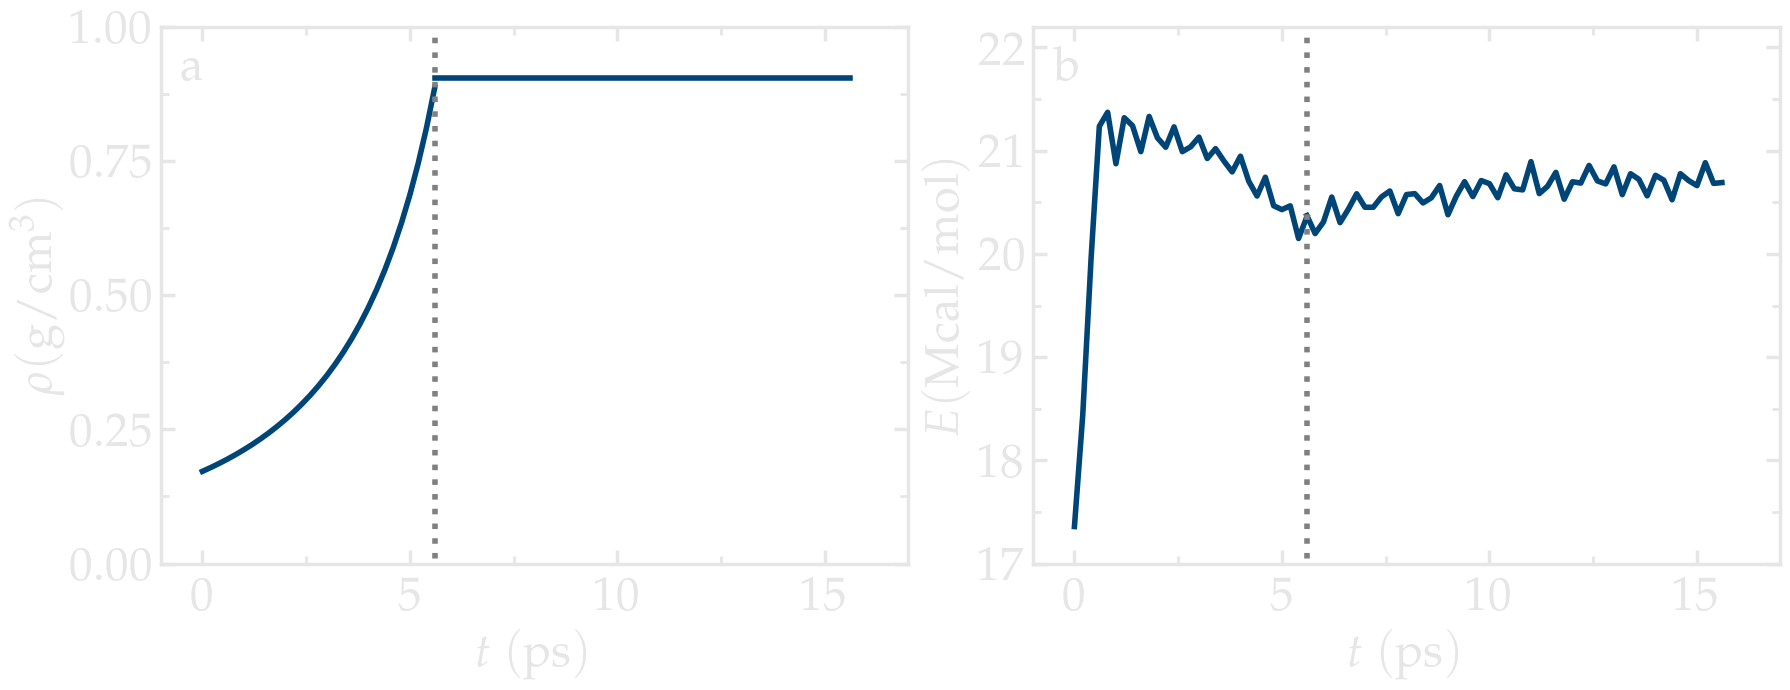

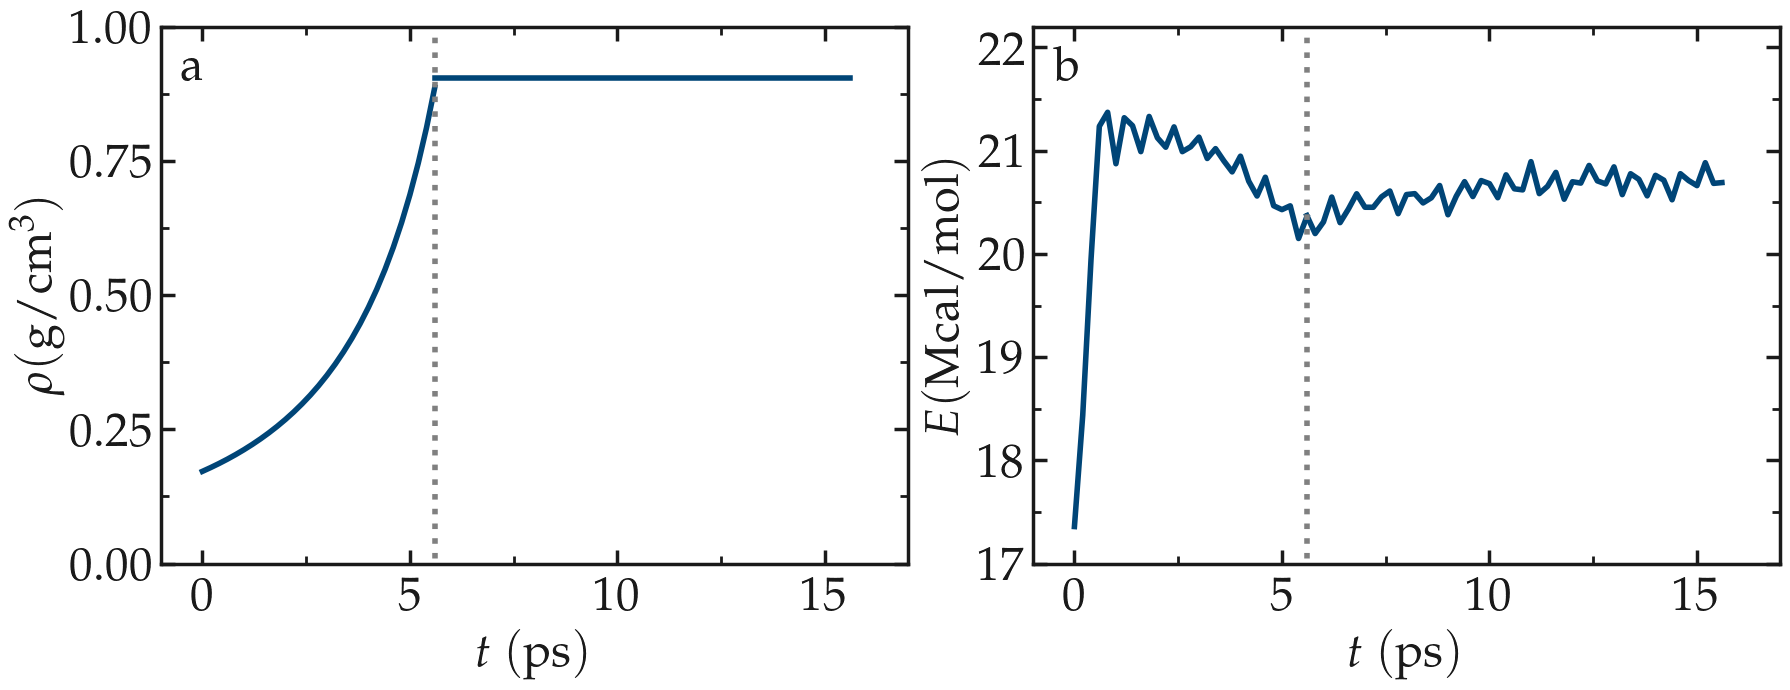

In [6]:
filename = "REACT-mixing"

for dark_mode in [True, False]:

    colors = colors_dark if dark_mode else colors_light
    globals().update(colors)

    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,7), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_colone=2)

    myplt.add_panel()
    myplt.add_plot(x = np.array(data_matrixes[0])[:,0]/1000,
                y =  np.array(data_matrixes[0])[:,5],
                type = "plot", linewidth_data = 3,
                marker = "-", data_color = 2, markersize = 12)
    myplt.add_plot(x = np.array(data_matrixes[1])[:,0]/1000+np.max(np.array(data_matrixes[0])[:,0])/1000,
                y =  np.array(data_matrixes[1])[:,5],
                type = "plot", linewidth_data = 3,
                marker = "-", data_color = 2, markersize = 12)
    x = np.linspace(-1000, 1000)
    myplt.add_plot(x = x*0+5.6, y = x, type = "plot", linewidth_data = 1.5,
                marker = ":", data_color = color0, markersize = 12)
    myplt.set_boundaries(x_boundaries=(-1, 17), x_ticks=np.arange(0, 15.1, 5),
                        y_boundaries=(0, 1), y_ticks=np.arange(0, 1.01, 0.25))
    myplt.complete_panel(ylabel = r'$\rho (\mathrm{g}/\mathrm{cm}^3)$',
                        xlabel = r'$t ~ \mathrm{(ps)}$',
                        xpad = 10, legend=False, handlelength_legend=1)

    myplt.add_panel()
    myplt.add_plot(x = np.array(data_matrixes[0])[:,0]/1000,
                y =  np.array(data_matrixes[0])[:,3]/1000,
                type = "plot", linewidth_data = 3,
                marker = "-", data_color = 2, markersize = 12)
    myplt.add_plot(x = np.array(data_matrixes[1])[:,0]/1000+np.max(np.array(data_matrixes[0])[:,0])/1000,
                y =  np.array(data_matrixes[1])[:,3]/1000,
                type = "plot", linewidth_data = 3,
                marker = "-", data_color = 2, markersize = 12)
    x = np.linspace(-1000, 1000)
    myplt.add_plot(x = x*0+5.6, y = x, type = "plot", linewidth_data = 1.5,
                marker = ":", data_color = color0, markersize = 12)
    myplt.set_boundaries(x_boundaries=(-1, 17), x_ticks=np.arange(0, 15.1, 5),
                        y_boundaries=(17, 22.2), y_ticks=np.arange(17, 22.1, 1))
    myplt.complete_panel(ylabel = r'$E (\mathrm{Mcal}/\mathrm{mol})$',
                        xlabel = r'$t ~ \mathrm{(ps)}$',
                        xpad = 10, legend=False, handlelength_legend=1)

    myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = path_figures)